# AA Assignment 1, Lim Wee Liang Kelven, S10221788K

# Directory <a id = "top"></a>

### 0. [Import Libraries](#part0)


### 1. [Explore Data](#part1)
- [1.1 Checking For Missing Values](#part1.1)
- [1.2 Replacing Missing Values](#part1.2)
- [1.3 Drop Redundant Columns](#part1.3)
- [1.4 Encode Categorical Columns](#part1.4)
    - [1.4.1 make](#part1.4.1)
    - [1.4.2 fuel_type](#part1.4.2)
    - [1.4.3 transmission](#part1.4.3)
    - [1.4.4 color](#part1.4.4)
    - [1.4.5 owner](#part1.4.5)
    - [1.4.6 seller_type](#part1.4.6)
    - [1.4.7 drivetrain](#part1.4.7)
- [1.5 Feature Scaling](#part1.5)
- [1.6 Trimming Outliers](#part1.6)


### 2. [K-Means Clustering Model](#part2)

### 3. [Hierarchical Clustering Model](#part3)

### 4. [Model Evaluation and Exploration](#part4)
- [4.1 Heatmap](#part4.1)
- [4.2 Boxplots](#part4.2)
- [4.3 Scatterplot](#part4.3)

# 0. Import Libraries <a id = "part0"></a>
[Back to top](#top)

In [1]:
# import the required packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

# 1. Explore Data <a id = "part1"></a>
[Back to top](#top)

## 1.1 Load Data <a id = "part1.1"></a>
[Back to top](#top)

In [2]:
# Get present working directory
pwd = os.getcwd()
pwd

'C:\\Users\\Kelve\\Downloads\\year_3.3\\AA\\ASG1'

In [3]:
# Load data
df = pd.read_csv(pwd+'./Used_Car_Price.csv')
df.head()

,MAKE,MODEL,PRICE,YEAR,KILOMETER,FUEL TYPE,TRANSMISSION,COLOR,OWNER,SELLER TYPE,ENGINE CAPACITY,MAX POWER,MAX TORQUE,DRIVETRAIN,LENGTH,WIDTH,HEIGHT,SEATING CAPACITY,FUEL TANK CAPACITY
0,Honda,Amaze 1.2 VX i-VTEC,12625,2017,87150,Petrol,Manual,Grey,First,Corporate,1198.0,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,11250,2014,75000,Diesel,Manual,White,Second,Individual,1248.0,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,5500,2011,67000,Petrol,Manual,Maroon,First,Individual,1197.0,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,19975,2019,37500,Petrol,Manual,Red,First,Individual,1197.0,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],48750,2018,69000,Diesel,Manual,Grey,First,Individual,2393.0,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
# Create a copy of the data
df_copy=df.copy()

In [5]:
# Convert all column name to lowercase and replace spaces with underscores
df_copy.columns = [x.lower().strip().replace(' ', '_') for x in df_copy.columns]

In [6]:
# Check dataframe information 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                2059 non-null   object 
 1   model               2059 non-null   object 
 2   price               2059 non-null   int64  
 3   year                2059 non-null   int64  
 4   kilometer           2059 non-null   int64  
 5   fuel_type           2059 non-null   object 
 6   transmission        2059 non-null   object 
 7   color               2059 non-null   object 
 8   owner               2059 non-null   object 
 9   seller_type         2059 non-null   object 
 10  engine_capacity     1979 non-null   float64
 11  max_power           1979 non-null   object 
 12  max_torque          1979 non-null   object 
 13  drivetrain          1923 non-null   object 
 14  length              1995 non-null   float64
 15  width               1995 non-null   float64
 16  height

In [7]:
# Create a new column 'car_age' using 'year' column
df_copy['car_age']=2023-df_copy['year']
df_copy.drop(['year'], axis=1, inplace=True)

In [8]:
# Check data information
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make                2059 non-null   object 
 1   model               2059 non-null   object 
 2   price               2059 non-null   int64  
 3   kilometer           2059 non-null   int64  
 4   fuel_type           2059 non-null   object 
 5   transmission        2059 non-null   object 
 6   color               2059 non-null   object 
 7   owner               2059 non-null   object 
 8   seller_type         2059 non-null   object 
 9   engine_capacity     1979 non-null   float64
 10  max_power           1979 non-null   object 
 11  max_torque          1979 non-null   object 
 12  drivetrain          1923 non-null   object 
 13  length              1995 non-null   float64
 14  width               1995 non-null   float64
 15  height              1995 non-null   float64
 16  seatin

## 1.2 Removing null values <a id = "part1.2"></a>
[Back to top](#top)

In [9]:
# Check number of null values in each column
df_copy.isnull().sum()

make                    0
model                   0
price                   0
kilometer               0
fuel_type               0
transmission            0
color                   0
owner                   0
seller_type             0
engine_capacity        80
max_power              80
max_torque             80
drivetrain            136
length                 64
width                  64
height                 64
seating_capacity       64
fuel_tank_capacity    113
car_age                 0
dtype: int64

In [10]:
# find string columns

# MAX POWER, MAX TORQUE, DRIVETRAIN have nulls

cat_cols = [n for n in df_copy.columns if df_copy[n].dtypes == 'O']
cat_cols

['make',
 'model',
 'fuel_type',
 'transmission',
 'color',
 'owner',
 'seller_type',
 'max_power',
 'max_torque',
 'drivetrain']

In [11]:
# Replace null in string columns with mode
for c in cat_cols:    
    df_copy[c].fillna(df_copy[c].mode()[0],inplace=True)

In [12]:
# Check if null values in string columns are removed
df_copy.isnull().sum()

make                    0
model                   0
price                   0
kilometer               0
fuel_type               0
transmission            0
color                   0
owner                   0
seller_type             0
engine_capacity        80
max_power               0
max_torque              0
drivetrain              0
length                 64
width                  64
height                 64
seating_capacity       64
fuel_tank_capacity    113
car_age                 0
dtype: int64

In [13]:
# find numerical columns

# ENGINE CAPACITY, LENGTH, WIDTH, HEIGHT, SEATING CAPACITY, FUEL TANK CAPACITY have nulls

num_cols = [n for n in df_copy.columns if df_copy[n].dtypes != 'O']
num_cols

['price',
 'kilometer',
 'engine_capacity',
 'length',
 'width',
 'height',
 'seating_capacity',
 'fuel_tank_capacity',
 'car_age']

In [14]:
# Replace null in numerical columns with mean
for c in num_cols:    
    df_copy[c].fillna(df_copy[c].mean(),inplace=True)

In [15]:
# Check if null values in string columns are removed
df_copy.isnull().sum()

make                  0
model                 0
price                 0
kilometer             0
fuel_type             0
transmission          0
color                 0
owner                 0
seller_type           0
engine_capacity       0
max_power             0
max_torque            0
drivetrain            0
length                0
width                 0
height                0
seating_capacity      0
fuel_tank_capacity    0
car_age               0
dtype: int64

## 1.3 Drop Redundant Columns <a id = "part1.3"></a>
[Back to top](#top)

In [16]:
# Drop columns 'model', 'max_power', and 'max_torque' because they have too many unique values to be mapped
df_copy=df_copy.drop(['model','max_power','max_torque'], axis=1)

## 1.4 Encode Categorical Columns <a id = "part1.4"></a>
[Back to top](#top)

In [17]:
# Create a copy dataframe
df_encode=df_copy.copy()

In [18]:
cat_cols = [n for n in df_encode.columns if df_encode[n].dtypes == 'O']

In [19]:
# Check the number of unique values in each column
for c in cat_cols:    
    print(c)
    print(df_encode[c].value_counts())
    print('\n======================================\n')

make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: make, dtype: int64


fuel_type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: fuel_type, dtype: int64


transmission
Manual       1133
Automatic    

### 1.4.1 make <a id = "part1.4.1"></a>
[Back to top](#top)

In [20]:
# Replace values with < 50 count with 'rare'
df_encode['make'] = df_encode['make'].replace(['Renault','Skoda','Land Rover','Kia','Jeep','Jaguar','MG','Nissan','Volvo',
                                               'Porsche','MINI','Datsun','Chevrolet','Lexus','Mitsubishi','Ssangyong',
                                               'Rolls-Royce','Isuzu','Fiat','Maserati','Ferrari','Lamborghini','Ford'],
                                              'rare')
df_encode['make'].value_counts()

Maruti Suzuki    440
Hyundai          349
rare             335
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Name: make, dtype: int64

In [21]:
# Create LabelEncoder
le_make = LabelEncoder()

# Fit encoder with column and transform
encoded_make = le_make.fit_transform(df_encode['make'])

# Replace column values with encoder values
df_encode['make'] = encoded_make

# Check column values
df_encode['make'].value_counts()

5     440
3     349
10    335
6     171
2     158
8     132
0     127
1     121
4     119
7      57
9      50
Name: make, dtype: int64

In [22]:
# Check how values are mapped by encoder
le_make.classes_

array(['Audi', 'BMW', 'Honda', 'Hyundai', 'Mahindra', 'Maruti Suzuki',
       'Mercedes-Benz', 'Tata', 'Toyota', 'Volkswagen', 'rare'],
      dtype=object)

### 1.4.2 fuel_type <a id = "part1.4.2"></a>
[Back to top](#top)

In [23]:
# Replace values with < 10 count with 'rare'
df_encode['fuel_type'] = df_encode['fuel_type'].replace(['Electric','LPG','Hybrid','CNG + CNG','Petrol + CNG',
                                                         'Petrol + LPG'],'rare')
df_encode['fuel_type'].value_counts()

Diesel    1049
Petrol     942
CNG         50
rare        18
Name: fuel_type, dtype: int64

In [24]:
# Create LabelEncoder
le_fuel_type = LabelEncoder()

# Fit encoder with column and transform
encoded_fuel_type = le_fuel_type.fit_transform(df_encode['fuel_type'])

# Replace column values with encoder values
df_encode['fuel_type'] = encoded_fuel_type

# Check column values
df_encode['fuel_type'].value_counts()

1    1049
2     942
0      50
3      18
Name: fuel_type, dtype: int64

In [25]:
# Check how values are mapped by encoder
le_fuel_type.classes_

array(['CNG', 'Diesel', 'Petrol', 'rare'], dtype=object)

### 1.4.3 transmission <a id = "part1.4.3"></a>
[Back to top](#top)

In [26]:
# Create LabelEncoder
le_transmission = LabelEncoder()

# Fit encoder with column and transform
encoded_transmission = le_transmission.fit_transform(df_encode['transmission'])

# Replace column values with encoder values
df_encode['transmission'] = encoded_transmission

# Check column values
df_encode['transmission'].value_counts()

1    1133
0     926
Name: transmission, dtype: int64

In [27]:
# Check how values are mapped by encoder
le_transmission.classes_

array(['Automatic', 'Manual'], dtype=object)

### 1.4.4 color <a id = "part1.4.4"></a>
[Back to top](#top)

In [28]:
# Replace values with < 50 count with 'rare'
df_encode['color'] = df_encode['color'].replace(['Brown','Maroon','Gold','Bronze','Green','Orange','Others','Yellow',
                                                 'Beige','Purple','Pink'],'rare')
df_encode['color'].value_counts()

White     802
Silver    285
rare      245
Grey      220
Blue      190
Black     163
Red       154
Name: color, dtype: int64

In [29]:
# Create LabelEncoder
le_color = LabelEncoder()

# Fit encoder with column and transform
encoded_color = le_color.fit_transform(df_encode['color'])

# Replace column values with encoder values
df_encode['color'] = encoded_color

# Check column values
df_encode['color'].value_counts()

5    802
4    285
6    245
2    220
1    190
0    163
3    154
Name: color, dtype: int64

In [30]:
# Check how values are mapped by encoder
le_color.classes_

array(['Black', 'Blue', 'Grey', 'Red', 'Silver', 'White', 'rare'],
      dtype=object)

### 1.4.5 owner <a id = "part1.4.5"></a>
[Back to top](#top)

In [31]:
# Replace values with < 30 count with 'rare'
df_encode['owner'] = df_encode['owner'].replace(['UnRegistered Car','Fourth','4 or More'],'rare')
df_encode['owner'].value_counts()

First     1619
Second     373
Third       42
rare        25
Name: owner, dtype: int64

In [32]:
# Map string values to int
df_encode['owner'] = df_encode['owner'].map({'First':0, 'Second':1, 'Third':2, 'rare':3})
df_encode['owner'].value_counts()

0    1619
1     373
2      42
3      25
Name: owner, dtype: int64

### 1.4.6 seller_type <a id = "part1.4.6"></a>
[Back to top](#top)

In [33]:
# Create LabelEncoder
le_seller_type = LabelEncoder()

# Fit encoder with column and transform
encoded_seller_type = le_seller_type.fit_transform(df_encode['seller_type'])

# Replace column values with encoder values
df_encode['seller_type'] = encoded_seller_type

# Check column values
df_encode['seller_type'].value_counts()

2    1997
1      57
0       5
Name: seller_type, dtype: int64

In [34]:
# Check how values are mapped by encoder
le_seller_type.classes_

array(['Commercial Registration', 'Corporate', 'Individual'], dtype=object)

### 1.4.7 drivetrain <a id = "part1.4.7"></a>
[Back to top](#top)

In [35]:
# Create LabelEncoder
le_drivetrain = LabelEncoder()

# Fit encoder with column and transform
encoded_drivetrain = le_drivetrain.fit_transform(df_encode['drivetrain'])

# Replace column values with encoder values
df_encode['drivetrain'] = encoded_drivetrain

# Check column values
df_encode['drivetrain'].value_counts()

1    1466
2     321
0     272
Name: drivetrain, dtype: int64

In [36]:
# Check how values are mapped by encoder
le_drivetrain.classes_

array(['AWD', 'FWD', 'RWD'], dtype=object)

## 1.5 Feature Scaling <a id = "part1.5"></a>
[Back to top](#top)

In [37]:
# Create a copy dataframe
df_scaled=df_encode.copy()

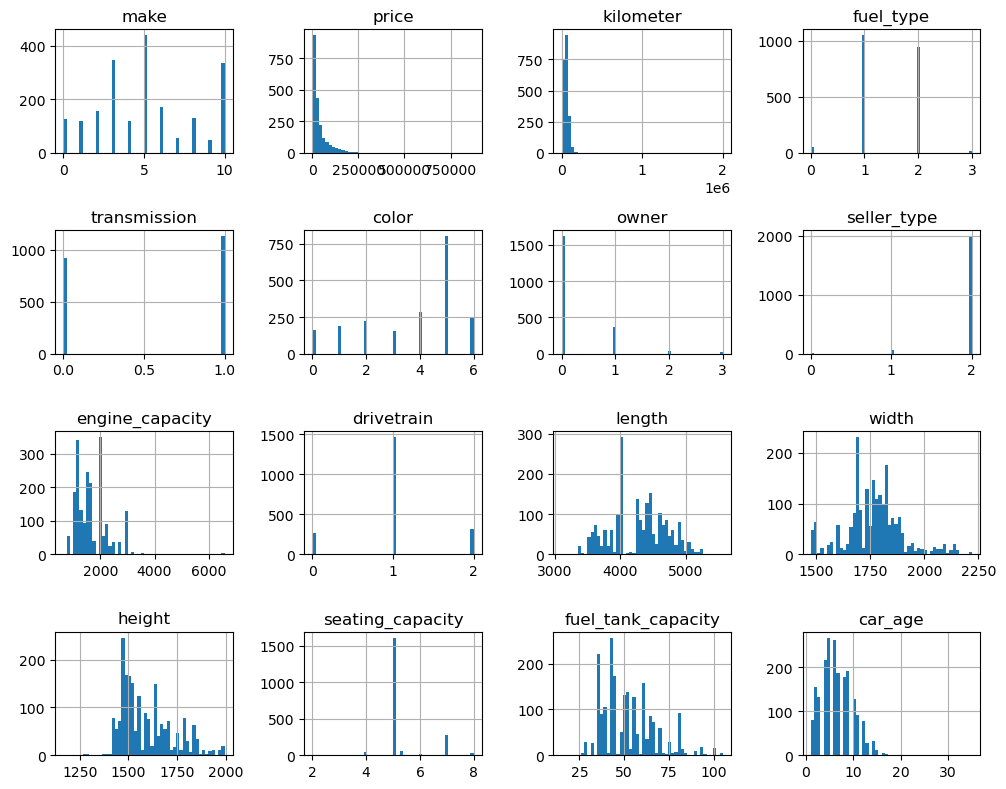

In [38]:
# plot the histogram to inspect variable distributions in numerical columns
df_scaled.hist(bins = 50, figsize = (10, 8))
plt.tight_layout()
plt.show()

In [39]:
# Scaling the data so that all the features/attributes become comparable 
scaler = StandardScaler()
for c in num_cols:
    df_scaled[c] = scaler.fit_transform(df_encode[c].values.reshape(-1,1))

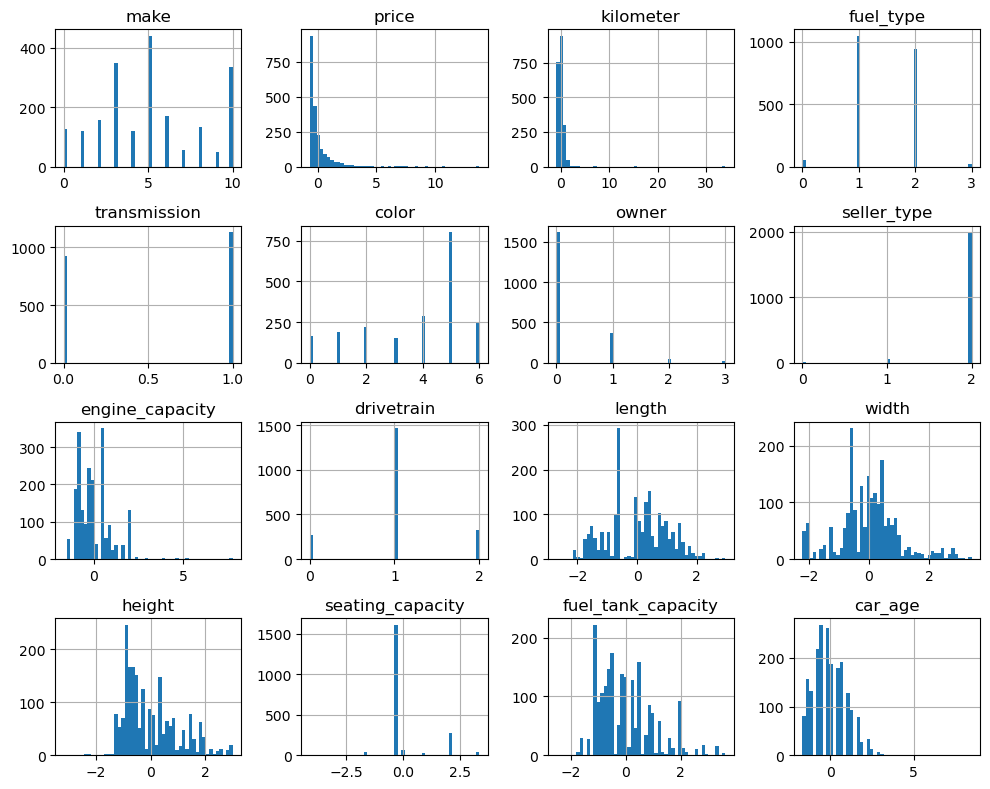

In [40]:
# plot the histogram to inspect variable distributions in numerical columns
df_scaled.hist(bins = 50, figsize = (10, 8))
plt.tight_layout()
plt.show()

## 1.6 Trimming Outliers <a id = "part1.6"></a>
[Back to top](#top)

In [41]:
# Create a copy dataframe
df_trim = df_scaled.copy()

In [42]:
for c in num_cols:
    # Find interquartile range
    q1=df_trim[c].quantile(0.25)
    q3=df_trim[c].quantile(0.75)
    iqr=q3-q1

    # Find lower and upper bounds
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr

    # Trim outliers
    df_trim=df_trim[(df_trim[c]>=lower_bound)&(df_trim[c]<=upper_bound)]

In [43]:
print(f'Number of rows before trimming: {len(df_scaled)}')
print(f'Number of rows after trimming: {len(df_trim)}')

Number of rows before trimming: 2059
Number of rows after trimming: 1243


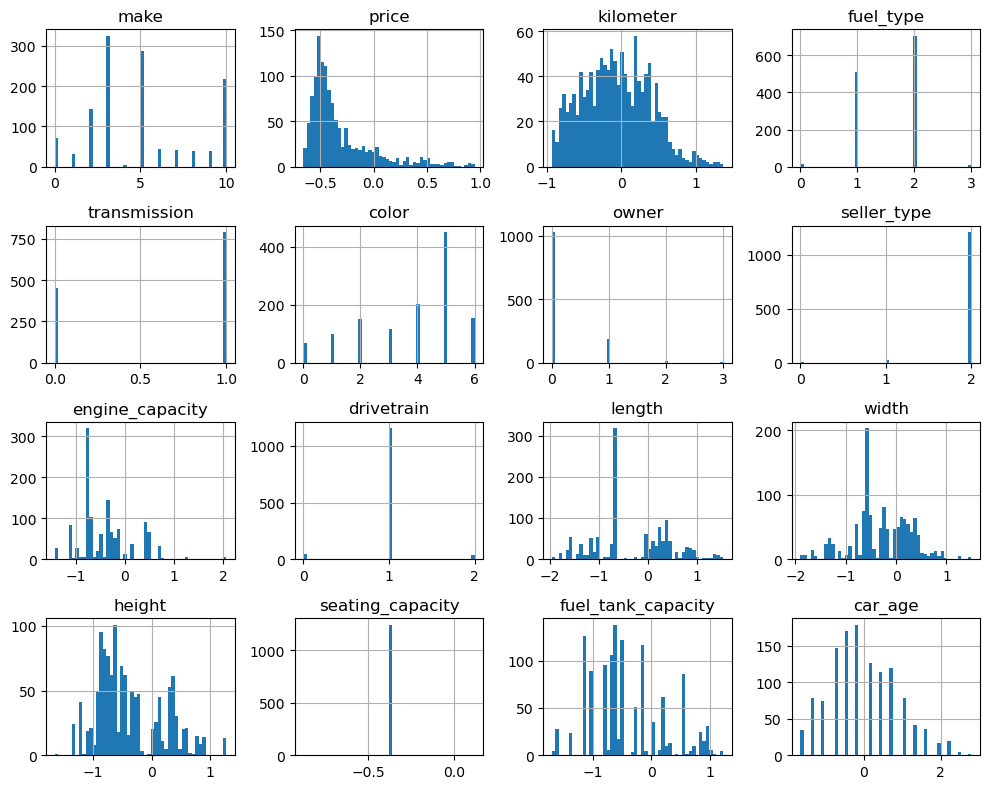

In [44]:
# plot the histogram to inspect variable distributions in numerical columns
df_trim.hist(bins = 50, figsize = (10, 8))
plt.tight_layout()
plt.show()

# 2. K-Means Clustering Model <a id = "part2"></a>
[Back to top](#top)

In [45]:
# Create a copy dataframe
df_modelling = df_trim.copy()

In [46]:
df_modelling.head()

,make,price,kilometer,fuel_type,transmission,color,owner,seller_type,engine_capacity,drivetrain,length,width,height,seating_capacity,fuel_tank_capacity,car_age
0,2,-0.495183,0.574133,2,1,2,0,1,-0.783862,1,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720,-0.170858
1,5,-0.517917,0.362268,1,1,5,1,2,-0.704616,1,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074,0.721270
2,3,-0.612986,0.222769,2,1,6,0,2,-0.785447,1,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720,1.613398
3,8,-0.373659,-0.291637,2,1,3,0,2,-0.785447,1,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535,-0.765609
5,5,-0.424914,0.332886,2,1,2,0,2,-0.506501,1,0.480318,-0.285410,-0.797074,-0.378532,-0.612981,-0.170858


In [47]:
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
y_pred = kmeans.fit_predict(df_modelling)

In [48]:
print(f'Initial silhouette score: {silhouette_score(df_modelling, kmeans.labels_)}')

Initial silhouette score: 0.3002427370041056


In [49]:
k_range = range(2,11)
silhouette_scores =[]

for i in k_range:
    km_i = KMeans(n_clusters=i, n_init=20, max_iter=300, random_state=1)
    silhouette_scores.append(silhouette_score(df_modelling, km_i.fit_predict(df_modelling)))
    
print(f'Best score: {max(silhouette_scores)}\nNumber of clusters: {silhouette_scores.index(max(silhouette_scores))+2}')

Best score: 0.416760568880557
Number of clusters: 2


In [50]:
kmeans = KMeans(n_clusters=2, n_init=20, max_iter=300, random_state=1)
y_pred = kmeans.fit_predict(df_modelling)
final_kmeans_score = silhouette_score(df_modelling, kmeans.labels_)
print(f'Improved silhouette score: {final_kmeans_score}')

Improved silhouette score: 0.416760568880557


# 3. Hierarchical Clustering Model <a id = "part3"></a>
[Back to top](#top)

In [51]:
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit_predict(df_modelling)

array([0, 2, 0, ..., 2, 0, 1], dtype=int64)

In [52]:
print(f'Initial silhouette score: {silhouette_score(df_modelling, ac.labels_)}')

Initial silhouette score: 0.22860255333128152


In [53]:
k_range = range(2,11)
silhouette_scores =[]

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i, linkage='ward')
    silhouette_scores.append(silhouette_score(df_modelling, ac_i.fit_predict(df_modelling)))

print(f'Best score: {max(silhouette_scores)}\nNumber of clusters: {silhouette_scores.index(max(silhouette_scores))+2}')

Best score: 0.4140167207098156
Number of clusters: 2


In [54]:
k_range = range(2,11)
silhouette_scores =[]

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_scores.append(silhouette_score(df_modelling, ac_i.fit_predict(df_modelling)))
    
print(f'Best score: {max(silhouette_scores)}\nNumber of clusters: {silhouette_scores.index(max(silhouette_scores))+2}')

Best score: 0.4157168274361415
Number of clusters: 2


In [55]:
ac = AgglomerativeClustering(n_clusters = 2, linkage='average')
ac.fit_predict(df_modelling)
final_hierarchical_score = silhouette_score(df_modelling, ac.labels_)
print(f'Improved silhouette score: {final_hierarchical_score}')

Improved silhouette score: 0.4157168274361415


# 4. Model Evaluation and Exploration <a id = "part4"></a>
[Back to top](#top)

In [56]:
print('Use K-Means' if final_kmeans_score>final_hierarchical_score else 'Use Hierarchical')

Use K-Means


## 4.1 Heatmap <a id = "part4.1"></a>
[Back to top](#top)

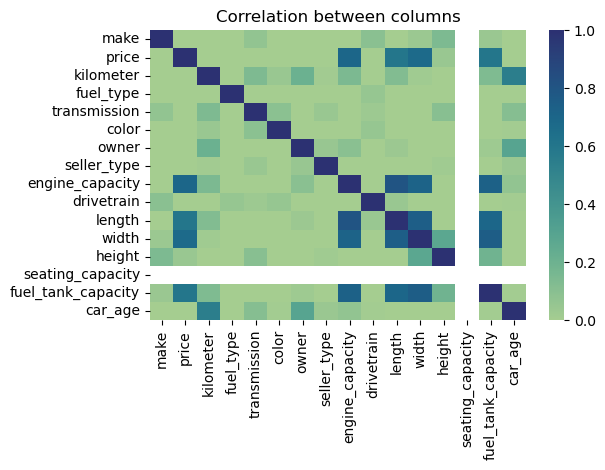

In [57]:
# Create heatmap
plot = sns.heatmap(df_modelling.corr(), cmap="crest", vmin=0, vmax=1)

# Set title
plt.title('Correlation between columns')

# Set layout
plt.tight_layout()

plt.show()

## 4.2 Boxplots <a id = "part4.2"></a>
[Back to top](#top)

In [58]:
temp = df_modelling.copy()
temp['cluster'] = y_pred

make


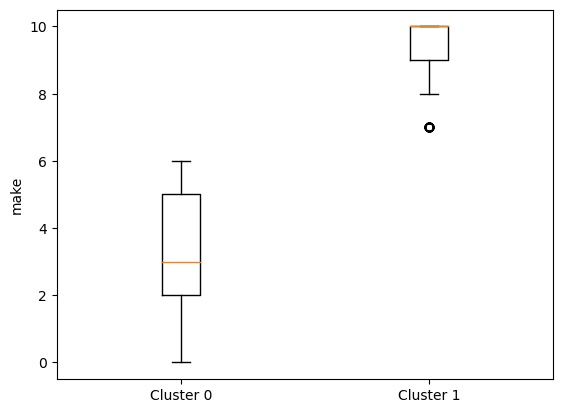

price


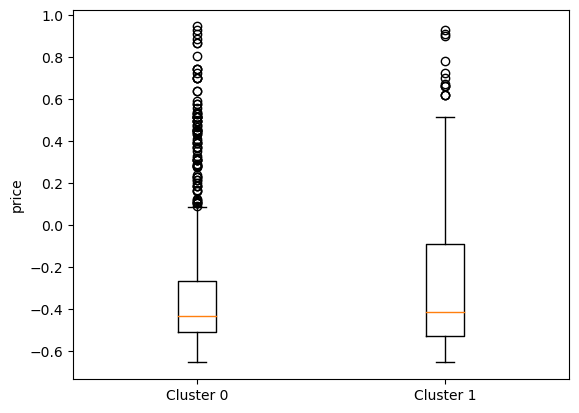

kilometer


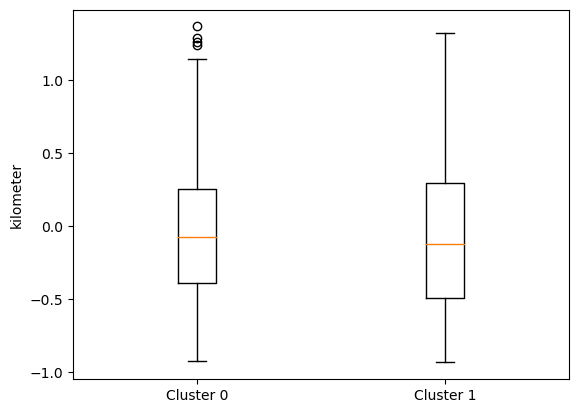

fuel_type


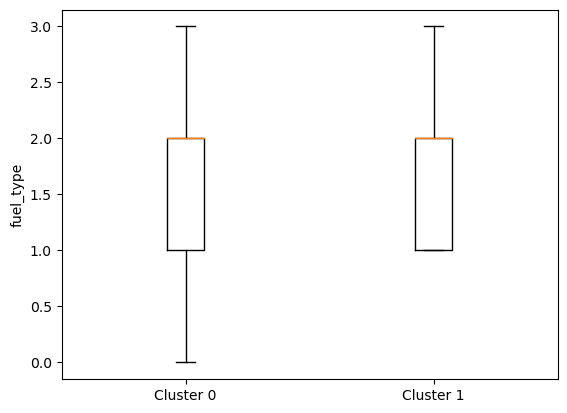

transmission


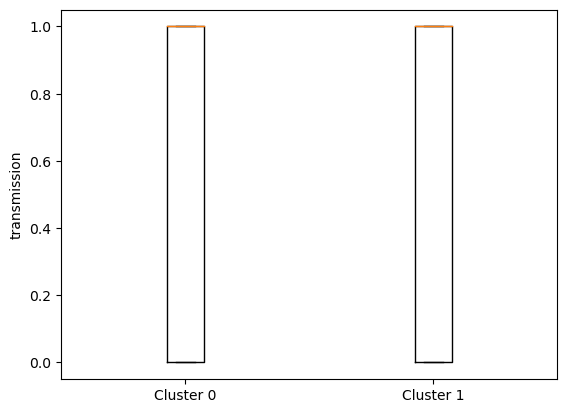

color


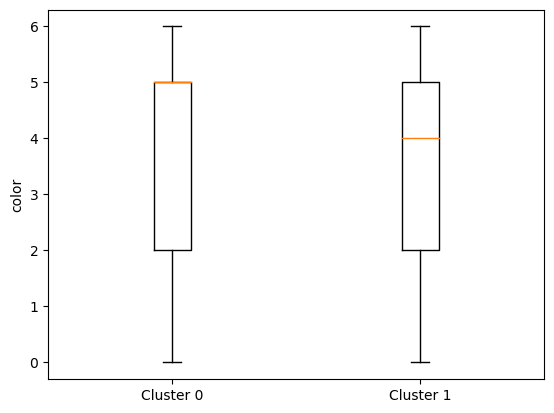

owner


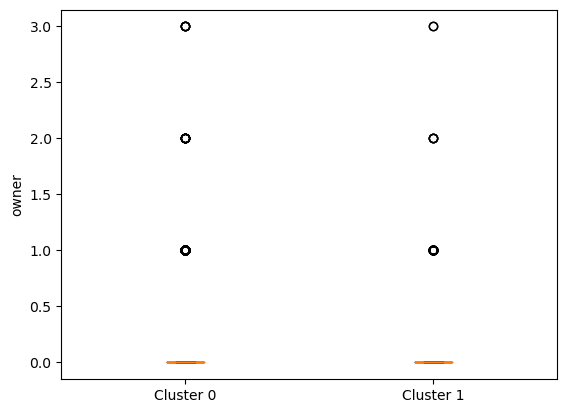

seller_type


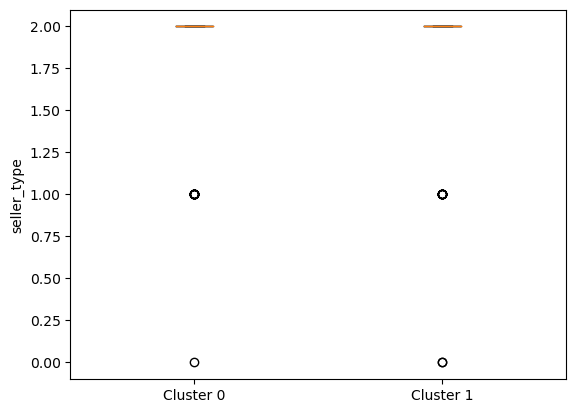

engine_capacity


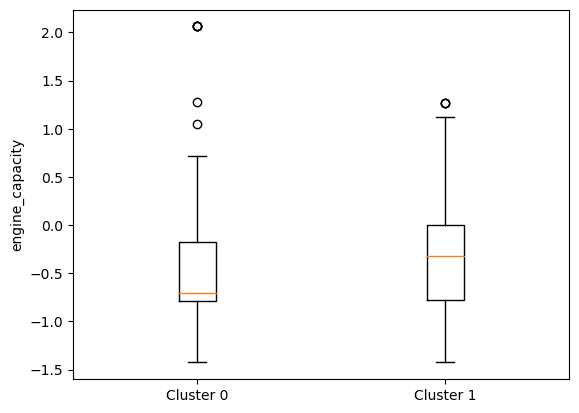

drivetrain


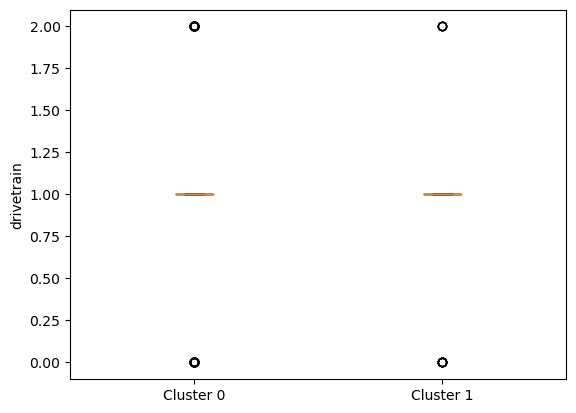

length


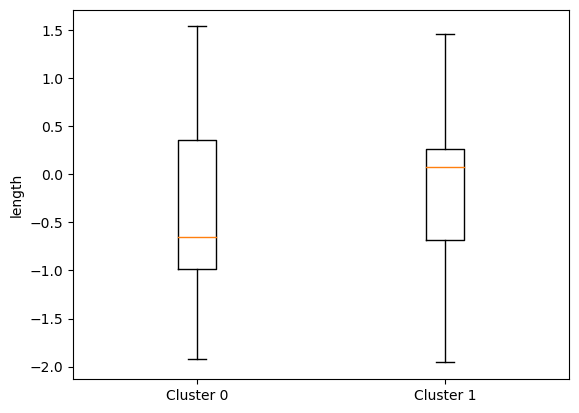

width


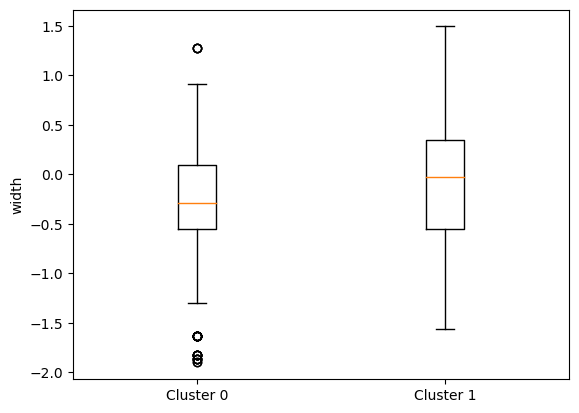

height


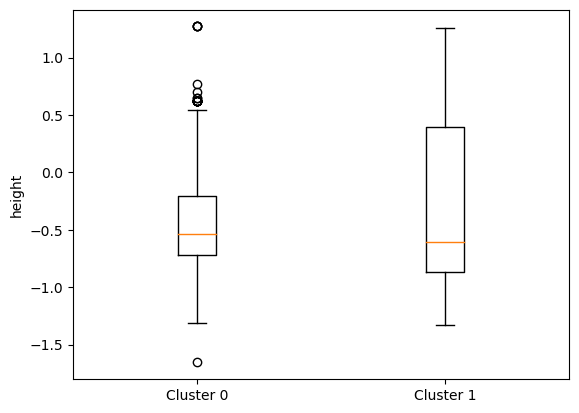

seating_capacity


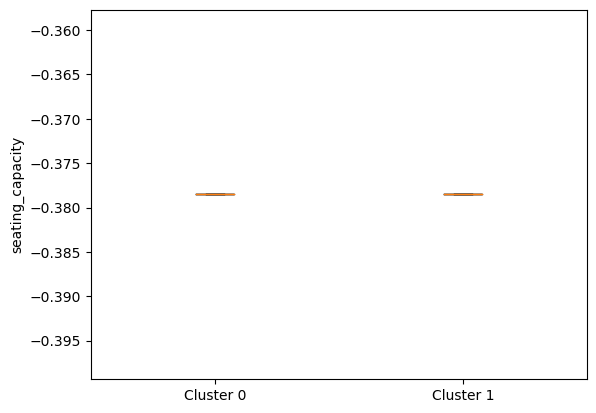

fuel_tank_capacity


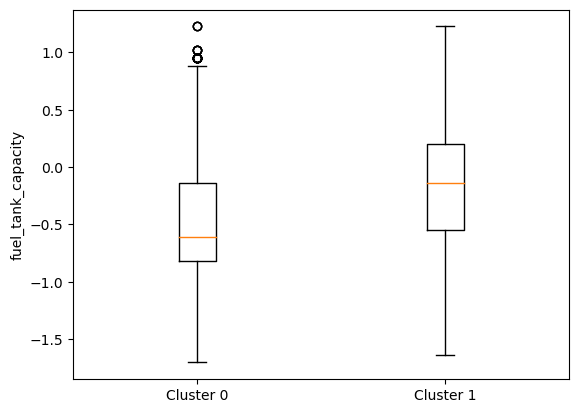

car_age


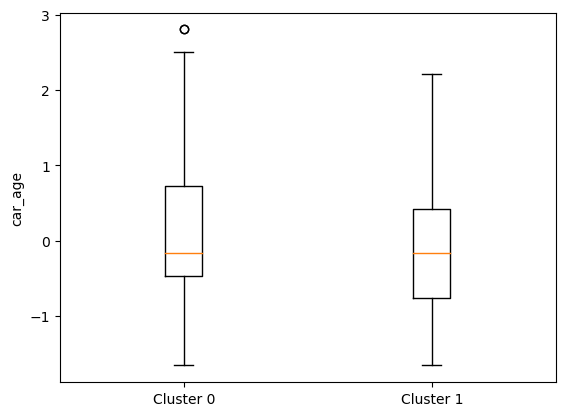

cluster


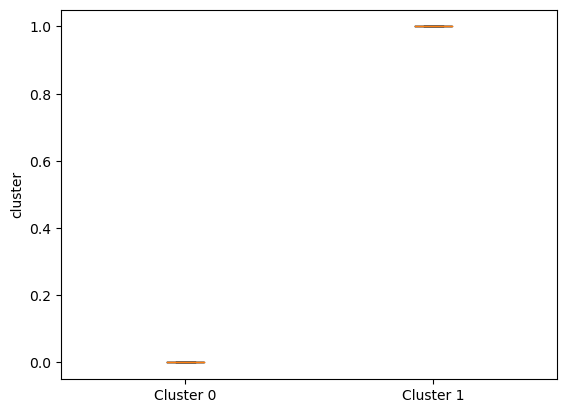

In [59]:
# Groupped Boxplots
i=0
for c in temp: 
    print(c) 
    plt.cla()
    plt.boxplot([temp.iloc[:,i][temp['cluster']==0].tolist(),
                 temp.iloc[:,i][temp['cluster']==1].tolist()],
                 labels=('Cluster 0','Cluster 1'))
    plt.ylabel(c)
    plt.show()
    i+=1

## 4.3 Scatterplot <a id = "part4.3"></a>
[Back to top](#top)

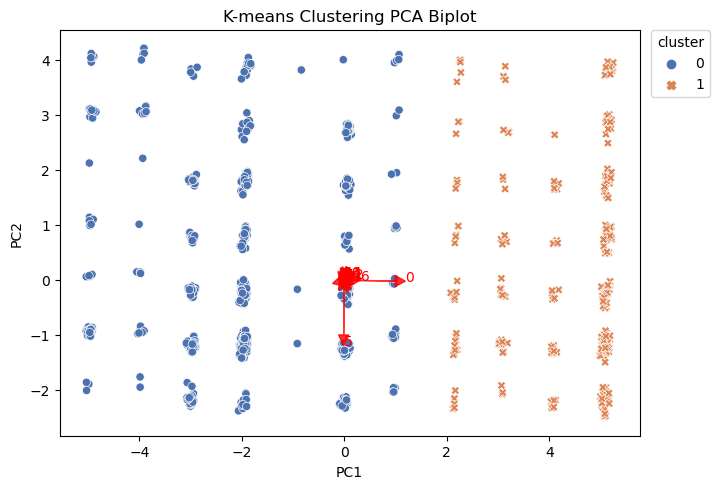

In [60]:
# Number of PCA components
pca_num_components = 2

# Create PCA
pca = PCA(n_components=pca_num_components)

# Fit and transform PCA model
pc = pca.fit_transform(temp)

# Transpose features
loadings = pca.components_.T

# Create scatterplot
fig, ax = plt.subplots()

sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=temp['cluster'], style=temp['cluster'], palette="deep")

# Plot the feature vectors as arrows
for i, feature in enumerate(loadings):
    ax.arrow(0, 0, feature[0], feature[1], head_width=0.2, head_length=0.2, color='r', alpha=0.8)
    ax.text(feature[0] * 1.2, feature[1] * 1.2, str(i), color='r')

# Set other ax details
plt.title('K-means Clustering PCA Biplot')
plt.tight_layout()
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='cluster')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Show the plot
plt.show()